In [1738]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from sklearn import datasets, svm
from sklearn.linear_model import LogisticRegression

from sklearn.inspection import DecisionBoundaryDisplay

In [1739]:
# import some data to play with
iris = datasets.load_wine()
X = iris.data[:, [0,2]]
y = iris.target[:]

# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)


In [1740]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

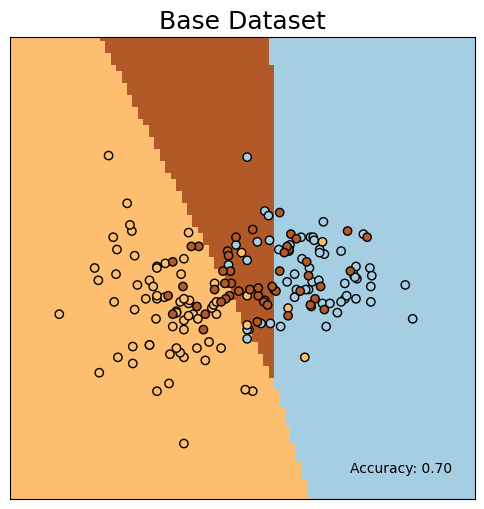

In [1797]:


plt.figure(figsize=(6, 6))

# we create an instance of SVM and fit out data.
clf = svm.SVC()
clf= LogisticRegression()
clf.fit(X, y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Base Dataset",size=18)
plt.axis("tight")

    
y_pred = clf.predict(X)
accuracy = np.mean(y_pred == y)

# Display accuracy
plt.text(0.95, 0.05, f"Accuracy: {accuracy:.2f}", transform=plt.gca().transAxes, ha='right', va='bottom')

plt.xlim(10.5, 15.5)
plt.ylim(1, 4)
plt.xticks(())
plt.yticks(())

p1 = plt.gcf()

plt.show()

In [1742]:
import numpy as np
n_outliers = 15
# Add impulse noise to X_normalized

# Add impulse noise to X_normalized
X_noisy = np.copy(X)
outlier_indices = np.random.choice(range(len(X_noisy)), size=n_outliers, replace=False)
X_noisy[outlier_indices] = X_noisy[outlier_indices] + np.random.uniform(low=-1, high=2, size=(n_outliers, X_noisy.shape[1])) 



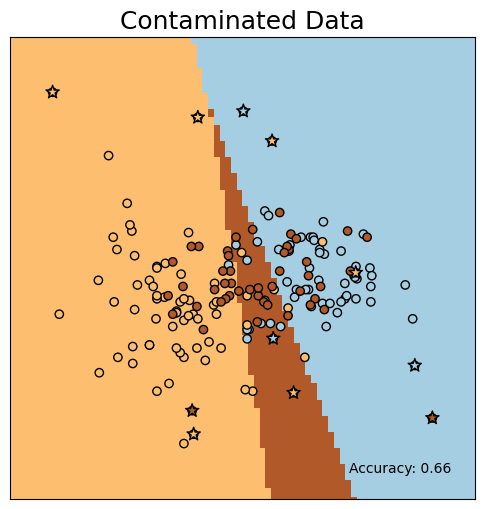

In [1798]:

# we create an instance of SVM and fit out data.



clf.fit(X_noisy, y)


plt.figure(figsize=(6, 6))

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_noisy,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.scatter(X_noisy[outlier_indices, 0], X_noisy[outlier_indices, 1], marker='*',c=y[outlier_indices],s=100, cmap=plt.cm.Paired, edgecolors="k")

plt.title("Contaminated Data",size=18)
plt.axis("tight")


    
y_pred = clf.predict(X_noisy)
accuracy = np.mean(y_pred == y)

# Display accuracy
plt.text(0.95, 0.05, f"Accuracy: {accuracy:.2f}", transform=plt.gca().transAxes, ha='right', va='bottom')


plt.xlim(10.5, 15.5)
plt.ylim(1, 4)
plt.xticks(())
plt.yticks(())

p2= plt.gcf()

plt.show()

In [1744]:
clf.fit(X_noisy, y)
y_pred = clf.predict(X_noisy)
accuracy = np.mean(y_pred == y)

In [1745]:
accuracy

0.6573033707865169

In [1746]:
from sklearn.neighbors import LocalOutlierFactor

# Create an instance of the LocalOutlierFactor class
lof = LocalOutlierFactor(n_neighbors=20)

# Fit the model and predict the outliers
outlier_mask = lof.fit_predict(X_noisy) == -1

# Remove the outliers from X_noisy
X_noisy_cleaned = X_noisy[~outlier_mask]
y_clean =  y[~outlier_mask]



# Create an instance of the LocalOutlierFactor class
lof = LocalOutlierFactor(n_neighbors=10)

# Initialize empty arrays for cleaned data and labels
X_noisy_cleaned = np.array([])
y_clean = np.array([])
outlier_mask = np.zeros(len(X_noisy))
# Iterate over unique classes
for class_label in np.unique(y):
    # Get the indices of samples belonging to the current class
    class_indices = np.where(y == class_label)[0]
    
    # Get the samples and labels for the current class
    class_samples = X_noisy[class_indices]
    class_labels = y[class_indices]
    
    class_mask = lof.fit_predict(class_samples) == -1
    
    
    
    # Fit the model and predict the outliers for the current class
    outlier_mask[class_indices]= class_mask

outlier_mask = outlier_mask == 1
X_noisy_cleaned = X_noisy[~outlier_mask]
y_clean = y[~outlier_mask]



In [1747]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

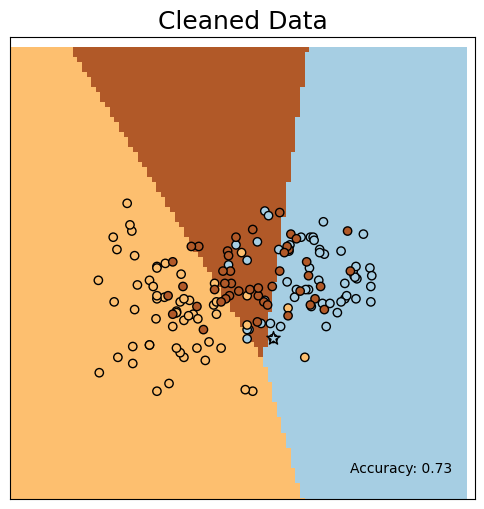

In [1799]:
# we create an instance of SVM and fit out data.
plt.figure(figsize=(6, 6))

clf.fit(X_noisy_cleaned, y_clean)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X_noisy_cleaned,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X_noisy_cleaned[:, 0], X_noisy_cleaned[:, 1], c=y_clean, cmap=plt.cm.Paired, edgecolors="k")

same_values_indices = np.where(np.isin(X_noisy_cleaned, X_noisy[outlier_indices]).all(axis=1))[0]

plt.scatter(X_noisy_cleaned[same_values_indices, 0], X_noisy_cleaned[same_values_indices, 1], marker='*',c=y_clean[same_values_indices],s=100, cmap=plt.cm.Paired, edgecolors="k")


plt.title("Cleaned Data",size=18)
plt.axis("tight")


# plt.xlim(-.25, 1.25)
# plt.ylim(-.25, 1.25)
    
y_pred = clf.predict(X_noisy_cleaned)
accuracy = np.mean(y_pred == y_clean)


# Display accuracy
plt.text(0.95, 0.05, f"Accuracy: {accuracy:.2f}", transform=plt.gca().transAxes, ha='right', va='bottom')

plt.xlim(10.5, 15.5)
plt.ylim(1, 4)
plt.xticks(())
plt.yticks(())
p3 = plt.gcf()
plt.show()



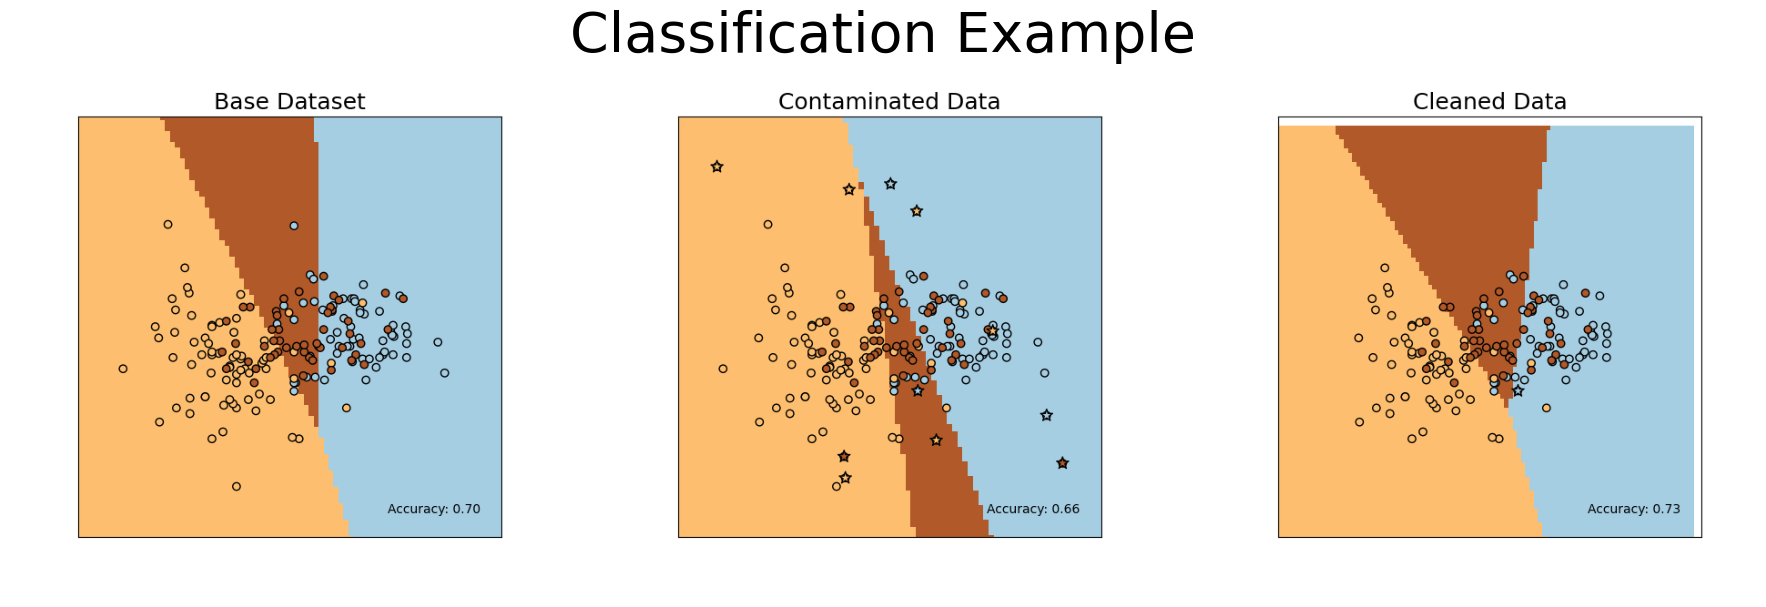

In [1800]:
from io import BytesIO
import matplotlib.pyplot as plt

# Convert the figures to image buffers
buffer_p1 = BytesIO()
buffer_p2 = BytesIO()
buffer_p3 = BytesIO()

p1.savefig(buffer_p1, format='png')
p2.savefig(buffer_p2, format='png')
p3.savefig(buffer_p3, format='png')

buffer_p1.seek(0)
buffer_p2.seek(0)
buffer_p3.seek(0)

# Read the image data from the buffers
img_p1 = plt.imread(buffer_p1)
img_p2 = plt.imread(buffer_p2)
img_p3 = plt.imread(buffer_p3)

# Create a combined plot with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [3, 3, 3]})  # Adjust width ratios as needed

# Plot each image in a separate subplot
axes[0].imshow(img_p1)
axes[0].axis('off')

axes[1].imshow(img_p2)
axes[1].axis('off')

axes[2].imshow(img_p3)
axes[2].axis('off')

# Set a common title for all subplots
fig.suptitle('Classification Example', fontsize=40)


# Adjust layout
fig.tight_layout(pad=0)

# Show the combined plot
plt.show()

